# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

%matplotlib inline


In [5]:

df_arvore = pd.read_csv('demo01_dummy.csv')
df_arvore = df_arvore.set_index('Unnamed: 0').reset_index(drop=True)
print(df_arvore.info())
df_arvore

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              6770 non-null   int64  
 1   idade                                   6770 non-null   int64  
 2   tempo_emprego                           6770 non-null   float64
 3   possui_celular                          6770 non-null   int64  
 4   possui_fone_comercial                   6770 non-null   int64  
 5   possui_fone                             6770 non-null   int64  
 6   possui_email                            6770 non-null   int64  
 7   qt_pessoas_residencia                   6770 non-null   int64  
 8   mau                                     6770 non-null   bool   
 9   sexo_M                                  6770 non-null   bool   
 10  posse_de_veiculo_Y                      6770 non-null   bool

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58,3.106849,1,0,0,0,2,False,True,...,True,False,False,False,False,True,False,False,False,False
1,0,52,8.358904,1,0,1,1,1,False,False,...,False,False,True,False,False,True,False,False,False,False
2,0,46,2.106849,1,1,1,1,2,False,True,...,True,False,False,False,False,True,False,False,False,False
3,0,29,3.021918,1,0,0,0,2,False,False,...,True,False,False,False,False,True,False,False,False,False
4,0,27,4.024658,1,0,1,0,2,False,False,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,1,34,3.101370,1,1,1,0,1,True,False,...,False,False,True,False,False,True,False,False,False,False
6766,0,54,9.884932,1,0,0,0,2,True,False,...,False,False,False,False,False,True,False,False,False,False
6767,0,43,7.380822,1,1,1,0,2,True,False,...,True,False,False,False,False,True,False,False,False,False
6768,0,30,9.800000,1,1,0,0,2,True,True,...,True,False,False,False,False,True,False,False,False,False


In [9]:
# Separe 70% da base para treinamento e 30% para validação. 
# Cada uma dessas partes terá dois objetos, 
# um armazenando a variável resposta mau e outro armazenando as variáveis explicativas 
# (lembrando: sem variáveis string, já com as dummies).

# X = Variáveis explicativas:
X = df_arvore.drop(columns='mau')
print('Quantidade de linhas e colunas das variáveis explicativas (X):', X.shape, '\n')

# y = Variável resposta:
y = df_arvore.mau

# Separando a base em 70% para treinamento e 30% para validação:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print('Quantidade de linhas e colunas de X_train (70%):', 
      X_train.shape)
print('Quantidade de linhas e colunas de X_test (30%):', 
      X_test.shape, '\n')

print('Quantidade de linhas de y_train (70%):', 
      len(y_train))
print('Quantidade de linhas de y_test (30%):', 
      len(y_test))

Quantidade de linhas e colunas das variáveis explicativas (X): (6770, 32) 

Quantidade de linhas e colunas de X_train (70%): (4739, 32)
Quantidade de linhas e colunas de X_test (30%): (2031, 32) 

Quantidade de linhas de y_train (70%): 4739
Quantidade de linhas de y_test (30%): 2031


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [11]:
# 1) Defina um objeto com a função da árvore de decisão vista em aula.

clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [13]:

# 2) Treine o modelo com os dados que você separou para treinamento.

clf = clf.fit(X=X_train, 
              y=y_train)
clf

DecisionTreeClassifier(random_state=100)

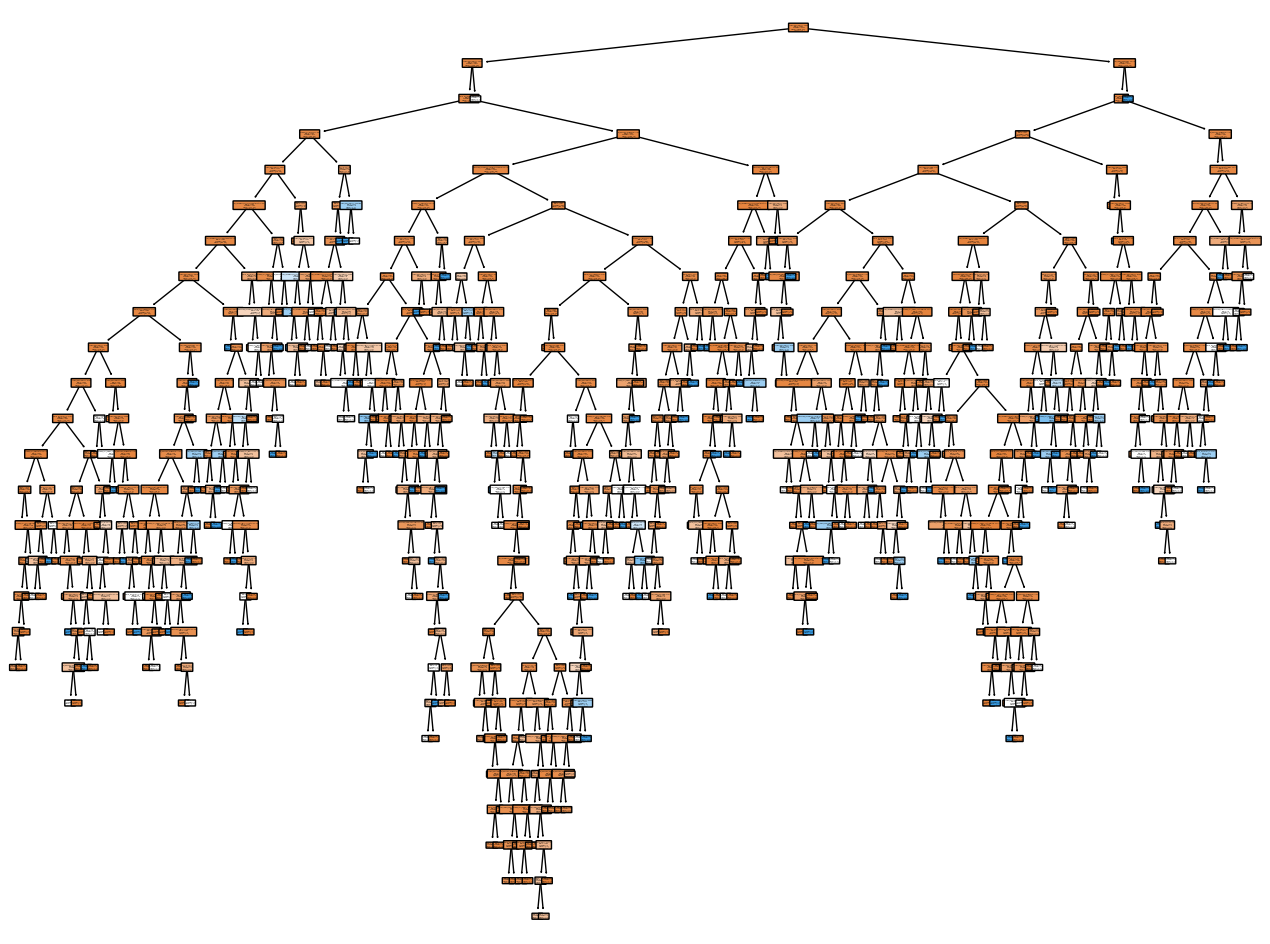

In [15]:

# 3) Visualize a árvore. Talvez você queira aumentar um pouco a figura.

plt.figure(figsize=(16,12))
plot_tree(decision_tree=clf,
          feature_names=X_train.columns,
          class_names=['bons', 'maus'],
          filled=True, 
          rounded=True)

plt.show()

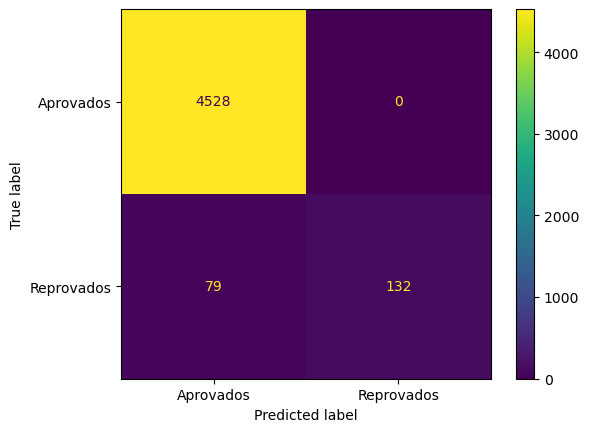

In [19]:
# 4) Produza uma visualização da matriz de classificação (ou matriz de confusão) - 
#    coloque os rótulos como "aprovados" e "reprovados" - 
#    pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.

y_pred = clf.predict(X_train)

cm = confusion_matrix(y_train, y_pred)

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

disp_train.plot()



In [23]:
# 5) Calcule a acurácia na base de treinamento.

print('Acurácia:')
predict_train = clf.predict(X=X_train)
accuracy_score(y_true=y_train, 
               y_pred=predict_train)

Acurácia:


0.9833298164169656

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [25]:
# 1) Classifique a base de teste de acordo com a árvore que você treinou no item 2.

predict_test = clf.predict(X=X_test)

print('Valores preditos:') 
print(pd.Series(predict_test).value_counts(), '\n')

print('Valores reais:')
print(y_test.value_counts())

Valores preditos:
False    1942
True       89
Name: count, dtype: int64 

Valores reais:
mau
False    1944
True       87
Name: count, dtype: int64


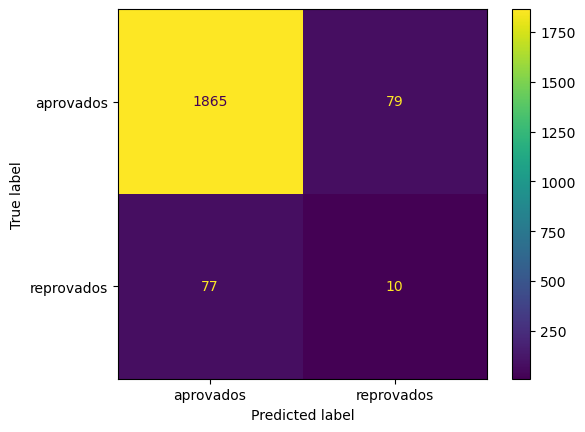

In [27]:
# 2) Produza a visualização da matriz de confusão para a base de teste.

ConfusionMatrixDisplay.from_estimator(estimator=clf, 
                                      X=X_test, 
                                      y=y_test, 
                                      display_labels=['aprovados', 'reprovados'])

plt.show()

In [29]:
# 3) Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.

print('Acurácia da base de teste:', 
      accuracy_score(y_true=y_test, 
                     y_pred=predict_test), '\n')

print('Acurácia da base de treinamento:', 
      accuracy_score(y_true=y_train, 
                     y_pred=predict_train))

Acurácia da base de teste: 0.9231905465288035 

Acurácia da base de treinamento: 0.9833298164169656


In [31]:

# 4) Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. 
#    Use o random_state = 123. Avalie a matriz de classificação. 
#    Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?

nova_clf = DecisionTreeClassifier(max_depth=10, 
                                  min_samples_leaf=5, 
                                  random_state=123)
nova_clf = nova_clf.fit(X=X_train, 
                        y=y_train)

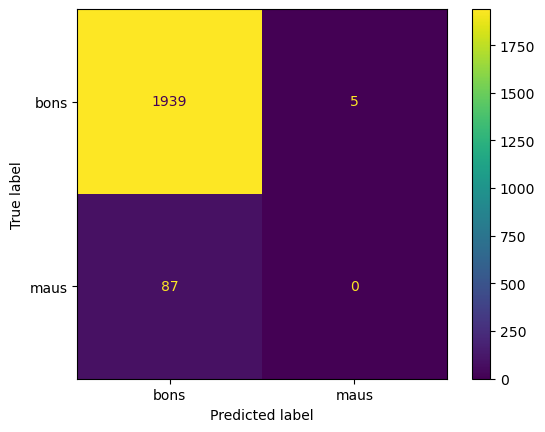

In [41]:


ConfusionMatrixDisplay.from_estimator(estimator=nova_clf, 
                                      X=X_test, 
                                      y=y_test, 
                                      display_labels=['bons', 'maus'])

plt.show()

In [45]:
print("Proporção de proponentes classificados como 'maus':",
      round(5/(1939+87+5)*100, 2), 
      '%')

Proporção de proponentes classificados como 'maus': 0.25 %


In [43]:

# 5) Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

print("Valores reais:")
print(pd.Series(y_test).value_counts(), 
      '\n')

print("Todos os contratos da base teste classificados como 'bons':")
print(pd.Series(y_test.replace(to_replace=True, 
                               value=False)
               ).value_counts(), 
      '\n')

print('Acurácia:', 
      round(accuracy_score(y_true=y_test, 
                           y_pred=y_test.replace(to_replace=True, value=False)) * 100, 2), '%')

Valores reais:
mau
False    1944
True       87
Name: count, dtype: int64 

Todos os contratos da base teste classificados como 'bons':
mau
False    2031
Name: count, dtype: int64 

Acurácia: 95.72 %
